In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
customers = pd.read_csv("Mall_Customers.csv")

In [4]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers["CustomerID"].nunique()

200

In [7]:
customers.drop("CustomerID", axis=1, inplace=True)

In [8]:
customers["Gender"] = customers["Gender"].map({"Female" : 0, "Male" : 1})

In [9]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<AxesSubplot:>

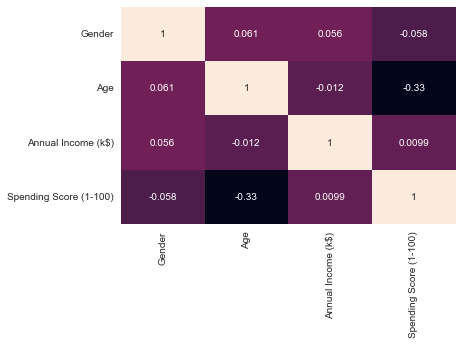

In [10]:
sns.heatmap(customers.corr(), annot=True, cbar=False)

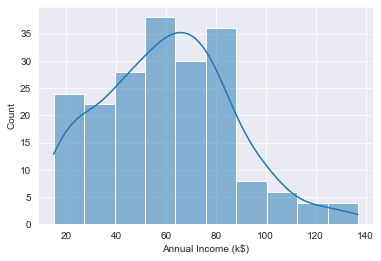

In [11]:
sns.histplot(x=customers["Annual Income (k$)"], kde=True);

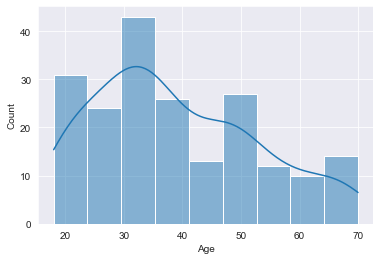

In [12]:
sns.histplot(x=customers["Age"], kde=True);

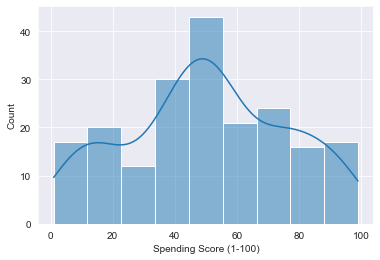

In [13]:
sns.histplot(customers["Spending Score (1-100)"], kde=True);

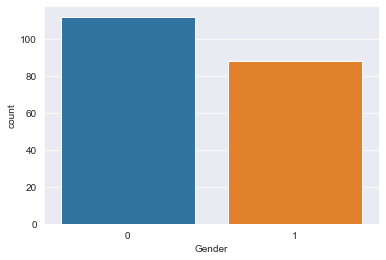

In [14]:
sns.countplot(x=customers["Gender"]);

In [15]:
customers.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

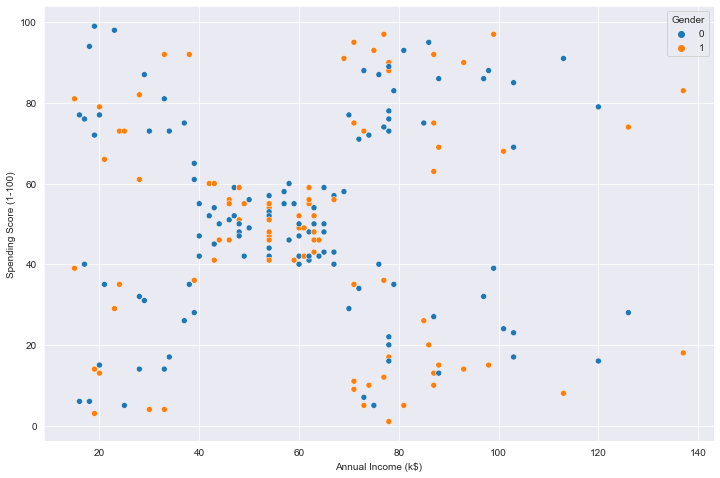

In [16]:
plt.figure(figsize=[12,8])
sns.scatterplot(x=customers["Annual Income (k$)"], y=customers["Spending Score (1-100)"], hue=customers["Gender"]);

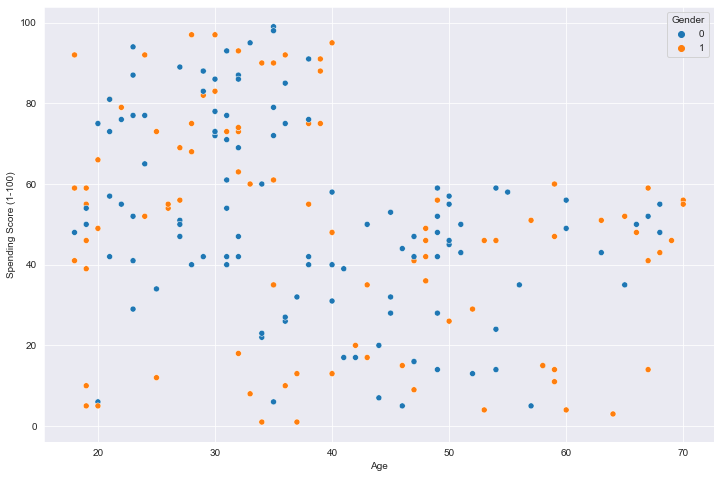

In [17]:
plt.figure(figsize=[12,8])
sns.scatterplot(x=customers["Age"], y=customers["Spending Score (1-100)"], hue=customers["Gender"]);

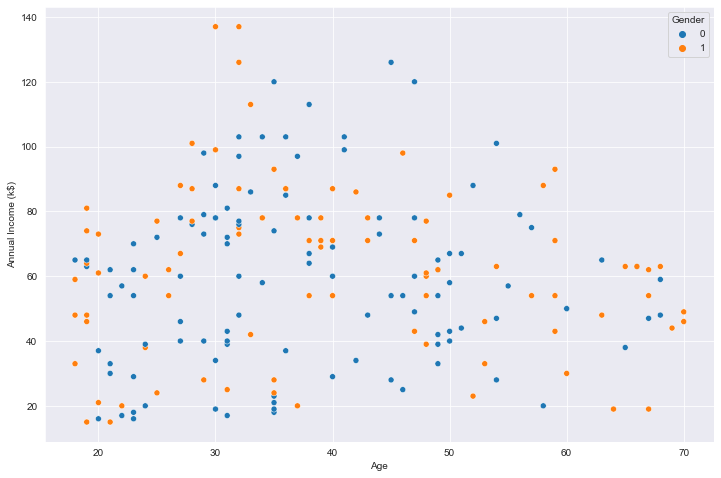

In [18]:
plt.figure(figsize=[12,8])
sns.scatterplot(x=customers["Age"], y=customers["Annual Income (k$)"], hue=customers["Gender"]);

In [19]:
import plotly.express as px
px.scatter_3d(x=customers["Annual Income (k$)"], y=customers["Spending Score (1-100)"], z=customers["Age"], 
            color=customers["Gender"], color_continuous_scale=["pink", "blue"])

### KMeans

In [20]:
from sklearn.cluster import KMeans

In [21]:
k = []
score = []

In [22]:
for num in range(1, 11):
    model = KMeans(n_clusters=num, random_state=51).fit(customers)
    k.append(num)
    score.append(model.inertia_)

c:\Users\Mofe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Mofe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Mofe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Mofe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

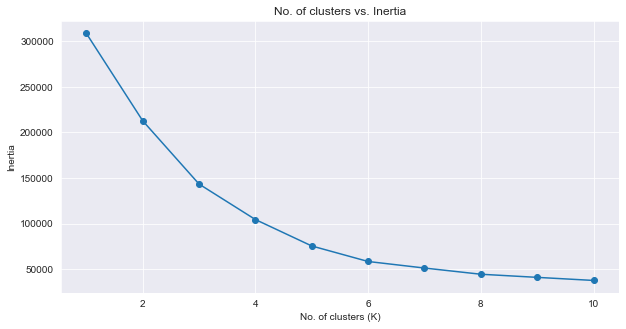

In [27]:
plt.figure(figsize=[10,5])
plt.title("No. of clusters vs. Inertia")
plt.plot(k, score, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [37]:
model = KMeans(4, random_state=51)

In [38]:
model.fit(customers);

c:\Users\Mofe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [39]:
predictions = model.predict(customers)

In [40]:
customers["Label"] = predictions

In [41]:
import plotly.express as px
px.scatter_3d(x=customers["Annual Income (k$)"], y=customers["Spending Score (1-100)"], z=customers["Age"], 
            color=customers["Label"])